# Final Project: Face Recognition
#### By Shivani Bhakta and Payal Singh 

In [17]:
# imports
import numpy as np
import glob
from PIL import Image
from PIL import Image, ImageOps
import numpy as np 
import matplotlib.pyplot as plt



import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.utils.data import sampler

import torchvision.datasets as dset
import torchvision.transforms as T

import numpy as np
import matplotlib.pyplot as plt

## Tufts Face DB 
In this project we use a dataset named Tufts Face Database for Facial Recognition. This dataset is made up with over 10,000 images of 74 female and 38 males from more than 15 countried with the age range between 4-70 years old. This dataset contains 7 image modalities, but we only use a subset of it, from the Tufts Face Databse 2D RGB Around (TDRGBA).


In this project we use few pictures for each person to train the model and the rest to predict which person's picture it is. There are total of 50 people, whose pictures we are going to use. 

## Visualize the dataset

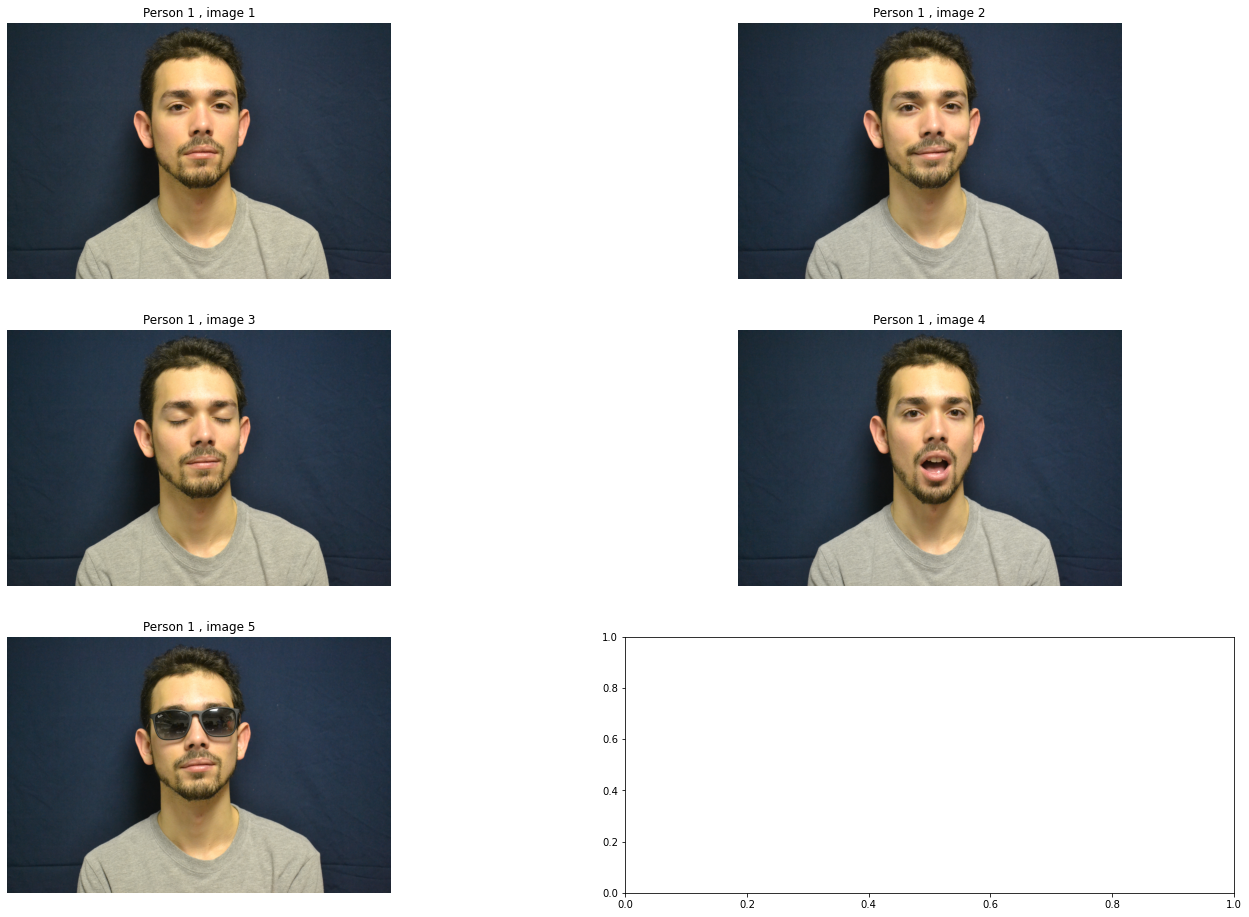

In [50]:
import matplotlib.pyplot as plt
import numpy as np
# import PI

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(24, 16))
for idx in range(1,6):
#         print("i,idx: ", i,idx)
    t = "dataset/Set1/1/TD_RGB_E_{}.jpg".format(idx)
    pic = plt.imread(t)
    
    if idx in [1,2]: 
        i = 0
        j = idx - 1
        
    elif idx in [3,4]:
        i = 1
        j = idx - 3    
    else: 
        i = 2
        j = idx - 5 
    axes[i][j].axis('off')
    axes[i][j].imshow(pic)
    axes[i][j].set_title("Person 1 , image {}".format(idx))



In [2]:
import torch
import copy

USE_GPU = True

dtype = torch.float32 # we will be using float throughout this tutorial

if USE_GPU and torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

# Constant to control how frequently we print train loss
print_every = 100

print('using device:', device)

using device: cuda


In [7]:
# http://vision.ucsd.edu/content/yale-face-database
images = []


for f in glob.iglob('Tufts/Set1/1/*'):
    images.append(np.asarray(Image.open(f)))
#     print(f)
#     break
    
images = np.array(images)
print(images.shape)

(36, 2464, 3280, 3)


In [6]:
# http://vision.ucsd.edu/content/yale-face-database
images = []

for i in range(1,3): 
    for f in glob.iglob('Tufts/Set1/'+  str(i) + '/*'):
        images.append(np.asarray(Image.open(f)))
#         print(f)
#         break


print(images.shape)
# images = np.array(images)

(72, 2464, 3280, 3)


In [16]:
# print(images[0,:,:,:])
# im1 = Image.open('Tufts/Set1/25/TD_RGB_A_4_6.jpg')
plt.imshow(images[,:,:,:], cmap='gray')

IndexError: index 36 is out of bounds for axis 0 with size 36

In [ ]:
# im1 = Image.open('yalefaces/subject12.glasses')
im1 = Image.open('Tufts/Set1/25/TD_RGB_A_4_6.jpg')
plt.imshow(np.array(im1), cmap='gray')

In [ ]:
im1 = Image.open('Tufts/Set1/25/TD_RGB_A_4_7.jpg')
plt.imshow(np.array(im1), cmap='gray')

In [ ]:
im1 = Image.open('Tufts/Set1/25/TD_RGB_A_4_8.jpg')
plt.imshow(np.array(im1), cmap='gray')

In [ ]:
# split into train and test
# train: centerlight, glasses, happy, leftlight, noglasses, normal, rightlight, sad
# test: sleepy, surprised, and wink

train_imgs = ['centerlight', 'glasses', 'happy', 'leftlight', 'noglasses', 'normal', 'rightlight', 'sad']
test_imgs = ['sleepy', 'surprised', 'wink']

train_data = []
test_data = []

images = []
for f in glob.iglob('yalefaces/*'):
    if f.split(".", 1)[1] in train_imgs:
        train_data.append(np.asarray(Image.open(f)))
    else:
        test_data.append(np.asarray(Image.open(f)))
        
train_data = np.array(train_data)
test_data = np.array(test_data)

In [ ]:
print(train_data.shape)
print(test_data.shape)

5/27 to do next:
- need dataloader
- figure out if data is already centered (if not, how to do it for PCA)
- feature extraction (PCA)
- train our ELMAN RNN (link for how to use RNN with Pytorch: https://www.kaggle.com/kanncaa1/recurrent-neural-network-with-pytorch, https://pytorch.org/docs/stable/generated/torch.nn.RNN.html)
- find optimal weights
- test
- try out other types of netral networks

Reference*
Any publication using this database must reference to this: 
- Website: http://tdface.ece.tufts.edu/ and this 
- Paper: Panetta, Karen, Qianwen Wan, Sos Agaian, Srijith Rajeev, Shreyas Kamath, Rahul Rajendran, Shishir Rao et al. "A comprehensive database for benchmarking imaging systems." IEEE Transactions on Pattern Analysis and Machine Intelligence (2018).